# Importing Necessary Libraries

In [376]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\smust\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [377]:
#loading the data
df = pd.read_csv(r'C:\Users\smust\ADULT_INCOME_PROJECT\adult.csv')

In [378]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [379]:
df.shape

(48842, 15)

In [380]:
#info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [381]:
#checkin null values
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [382]:
#checking unique values
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [383]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [384]:
#value counts
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [385]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [386]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [387]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [388]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [389]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [390]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [391]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


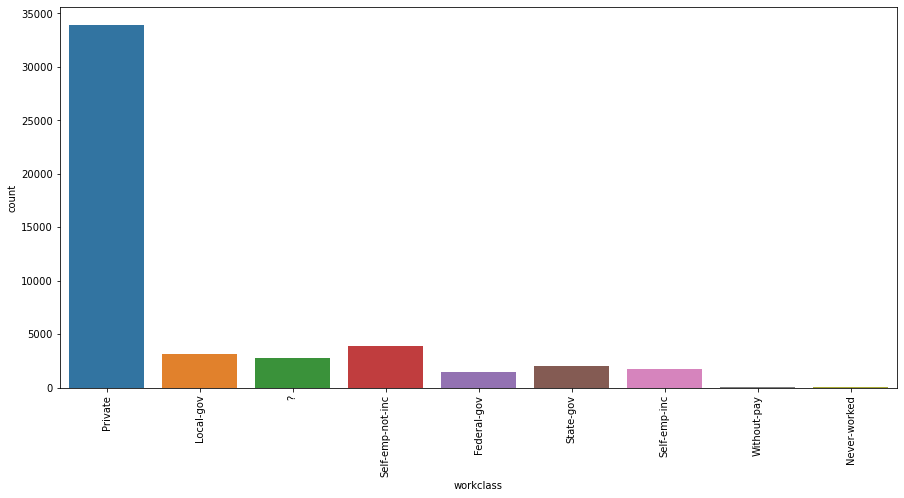

In [392]:
#most of the people work for private sector
plt.figure(figsize = (15, 7))
sns.countplot(df['workclass'])
xticks(rotation = 90)
plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


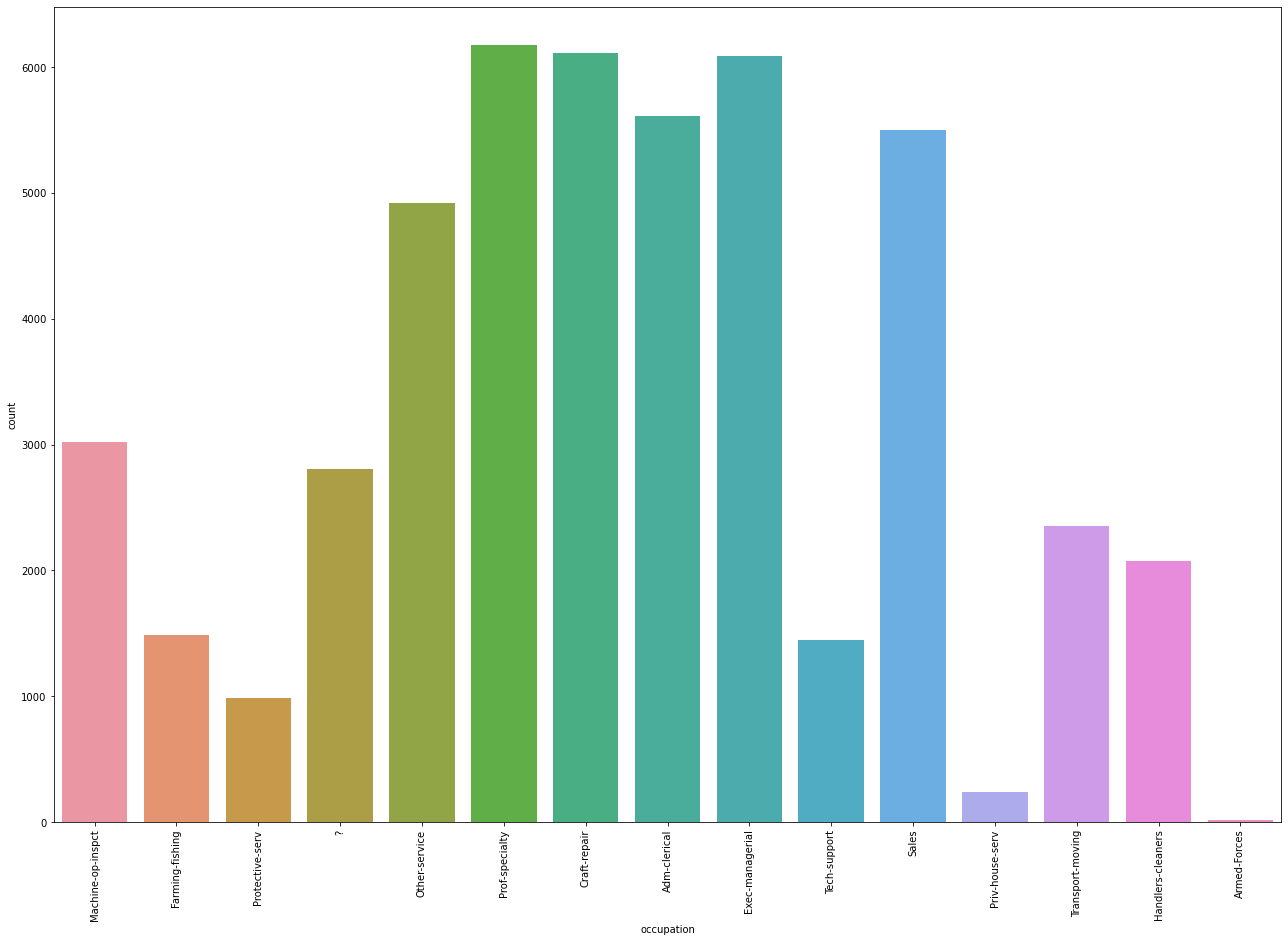

In [393]:
#checking the peoples occupation
plt.figure(figsize = (22, 15))
sns.countplot(df['occupation'])
xticks(rotation = 90)
plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


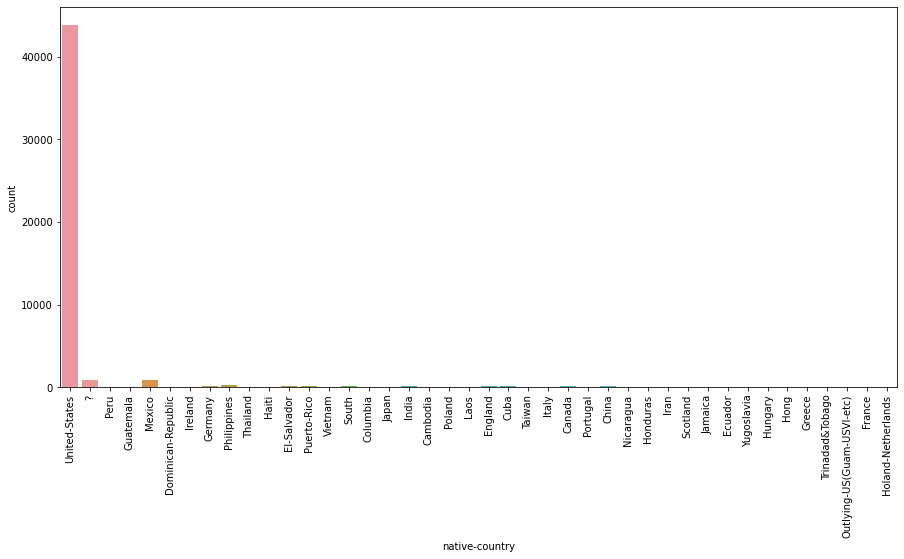

In [394]:
#most of the people are from United States
plt.figure(figsize = (15, 7))
sns.countplot(df['native-country'])
xticks(rotation = 90)
plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


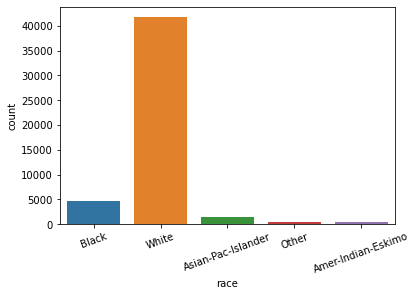

In [395]:
#most of the people belongs to white race
sns.countplot(df['race'])
xticks(rotation = 20)
plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


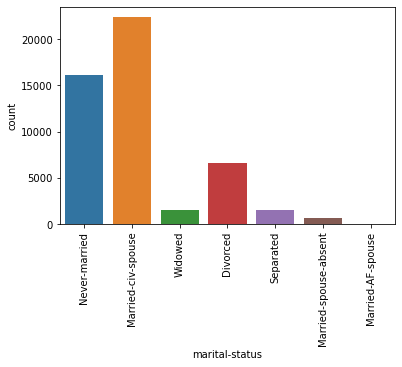

In [396]:
#most of the people are married civilian spouse
sns.countplot(df['marital-status'])
plt.xticks(rotation = 90)
plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


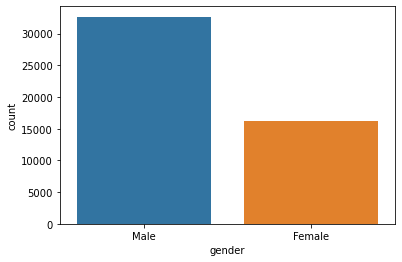

In [397]:
#male gender is higher
sns.countplot(df['gender'])
plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


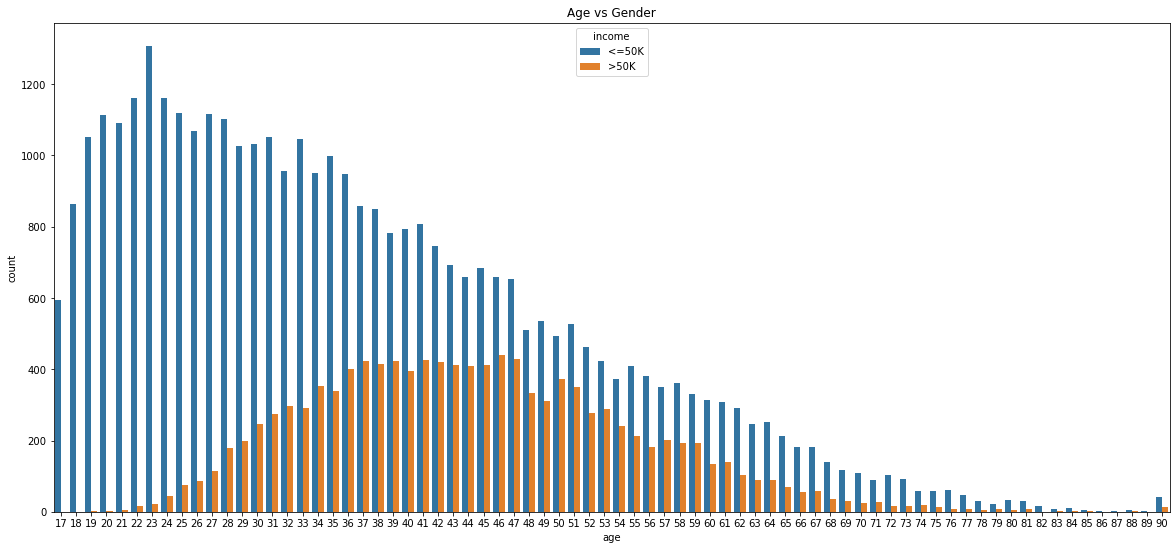

In [398]:
#checking reltionship btween income and age
plt.figure(figsize = (20, 9))
plt.title('Age vs Gender')
sns.countplot(df['age'], hue = 'income', data = df)
plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


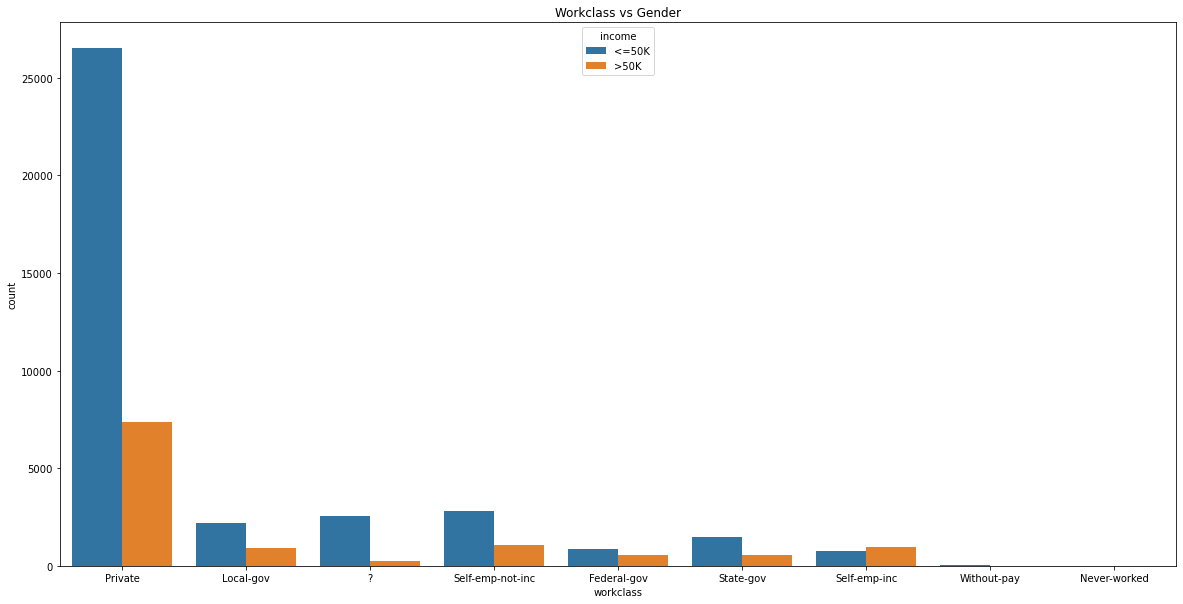

In [399]:
#checking reltionship btween income and workclass
plt.figure(figsize = (20, 10))
plt.title('Workclass vs Gender')
sns.countplot(df['workclass'], hue = 'income', data = df)
plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


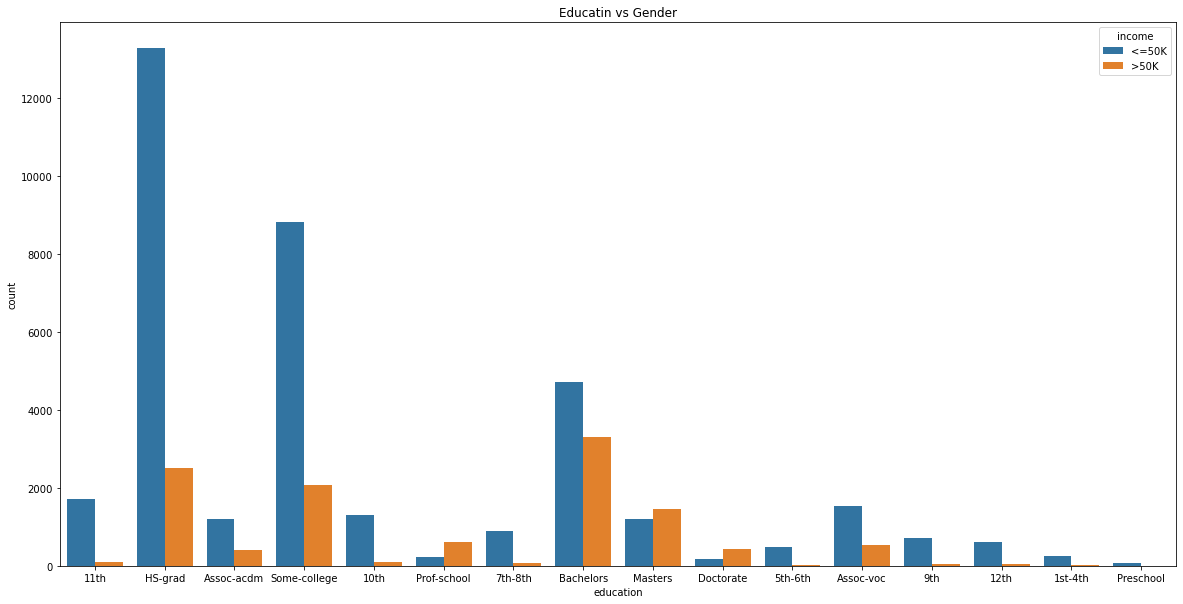

In [400]:
#checking reltionship btween income and education
plt.figure(figsize = (20, 10))
plt.title('Educatin vs Gender')
sns.countplot(df['education'], hue = 'income', data = df)
plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


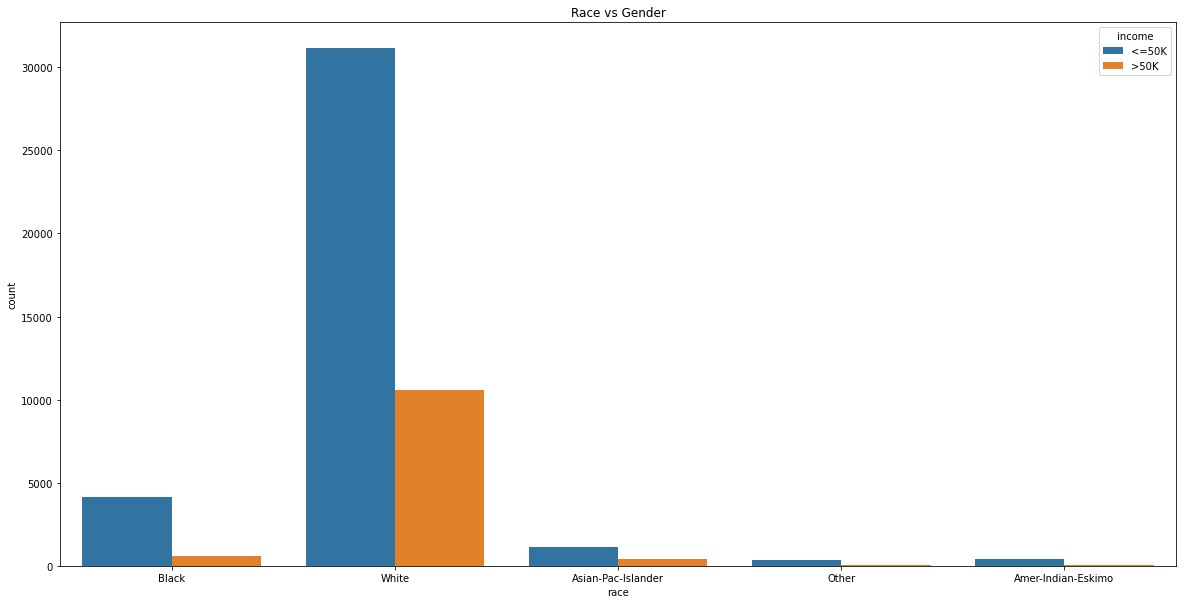

In [401]:
#checking reltionship btween income and race
plt.figure(figsize = (20, 10))
plt.title('Race vs Gender')
sns.countplot(df['race'], hue = 'income', data = df)
plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


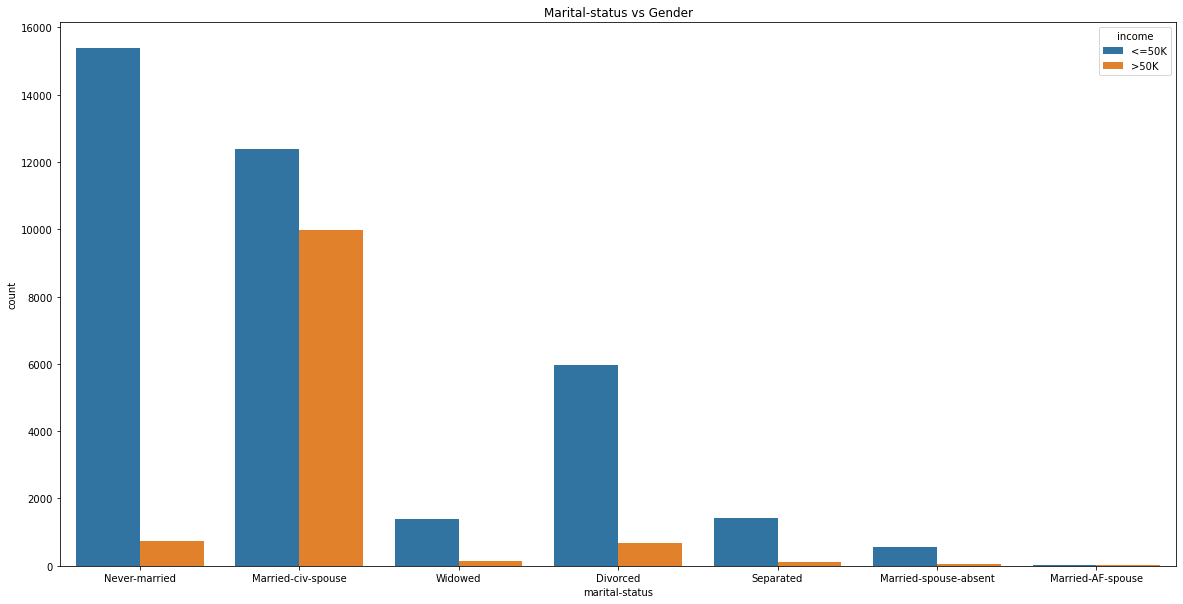

In [402]:
#checking reltionship btween income and age
plt.figure(figsize = (20, 10))
plt.title('Marital-status vs Gender')
sns.countplot(df['marital-status'], hue = 'income', data = df)
plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


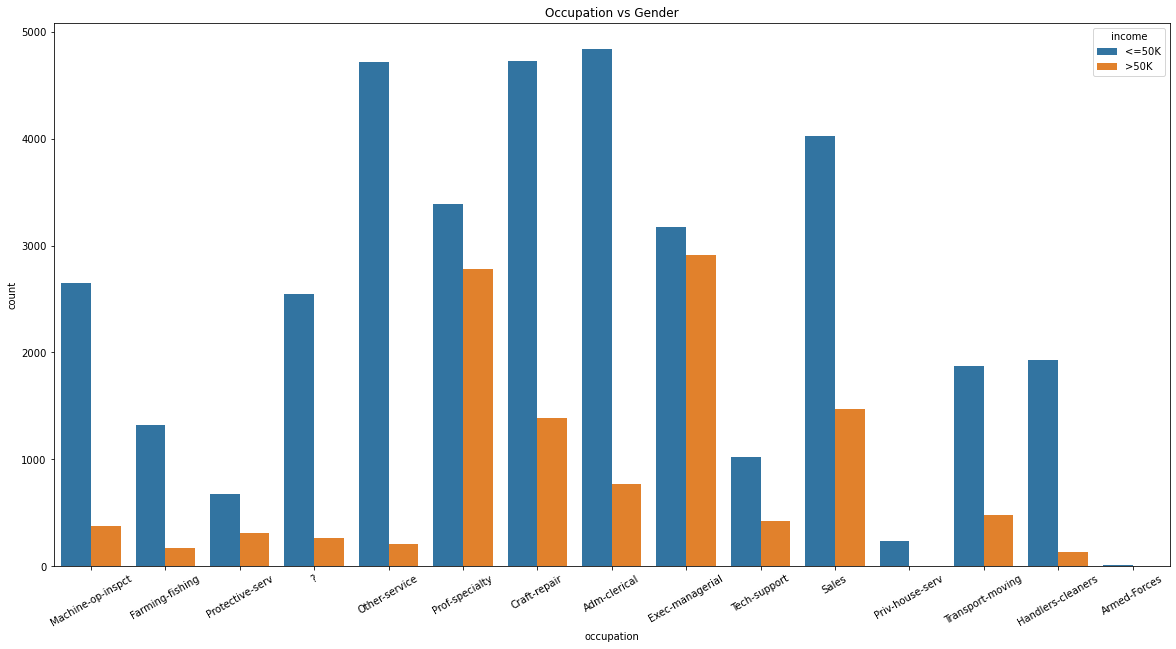

In [403]:
#checking reltionship btween income and occupation
plt.figure(figsize = (20, 10))
plt.title('Occupation vs Gender')
plt.xticks(rotation = 30)
sns.countplot(df['occupation'], hue = 'income', data = df)
plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


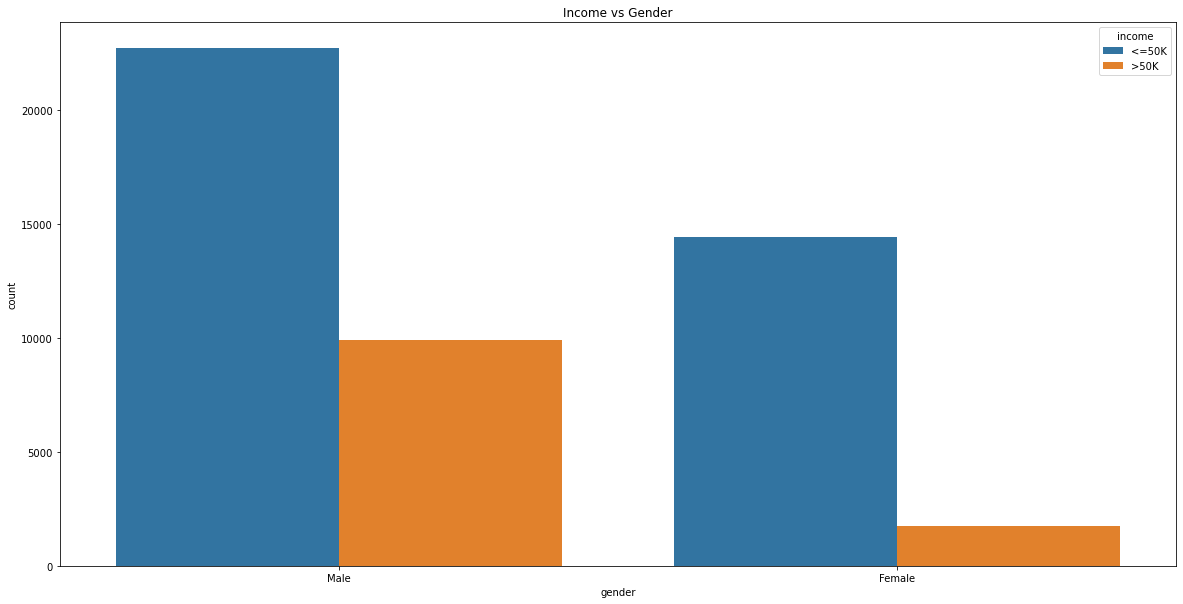

In [404]:
#checking who is getting higher income
plt.figure(figsize = (20, 10))
plt.title('Income vs Gender')
sns.countplot(df['gender'], hue = 'income', data = df)
plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


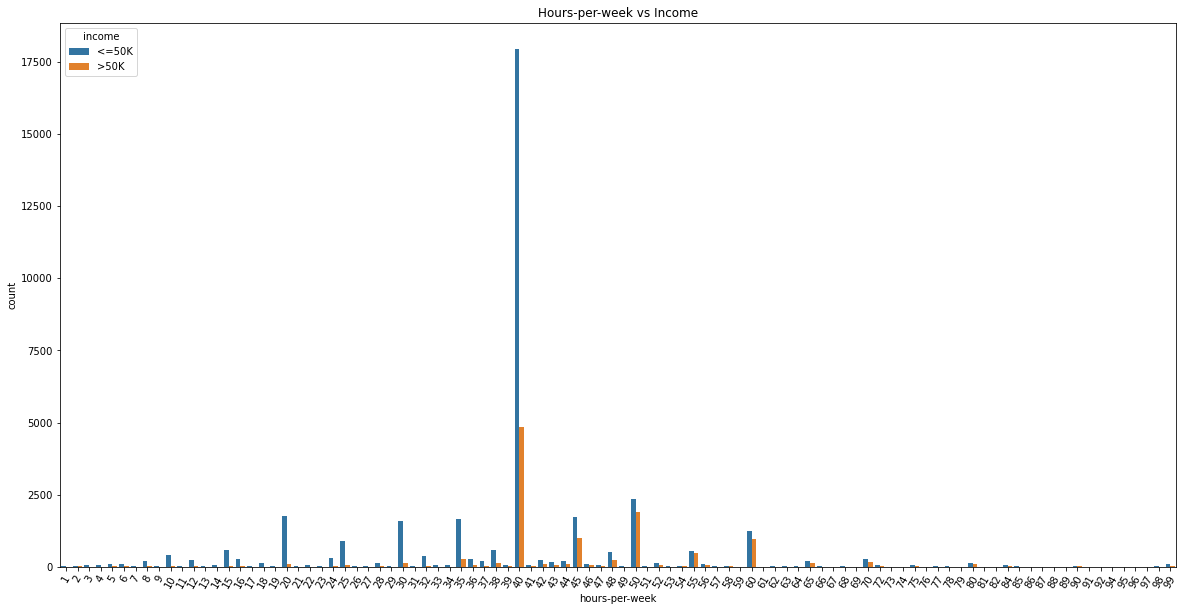

In [405]:
#checking reltionship btween income and hours-per-week
plt.figure(figsize = (20, 10))
plt.title('Hours-per-week vs Income')
sns.countplot(df['hours-per-week'], hue = 'income', data = df)
plt.xticks(rotation = 60)
plt.show()

In [406]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


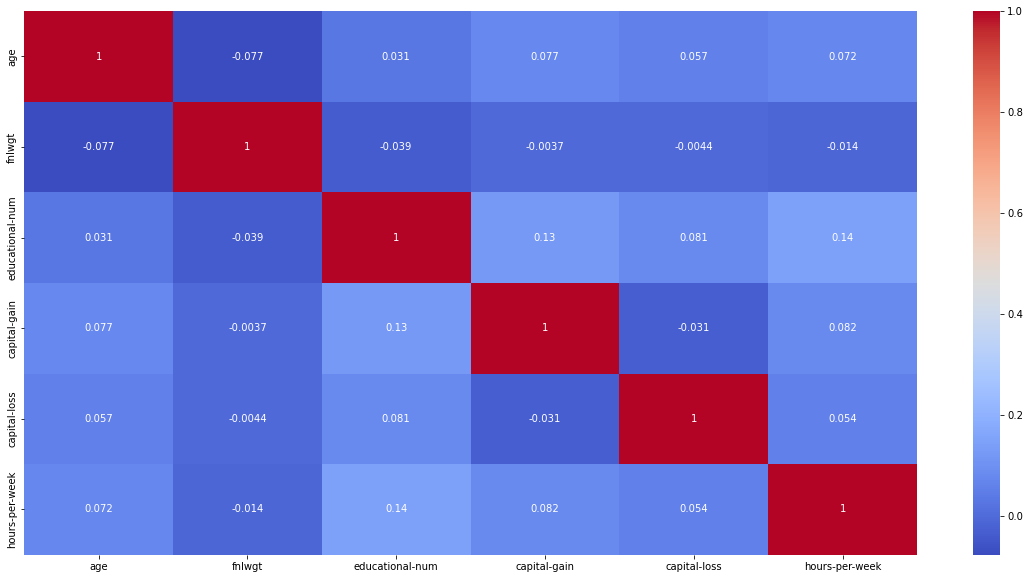

In [407]:
#correlation of the data
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot = True)
plt.show()

# Data Cleaning

replacing special characters '?' with mode

In [408]:
print(df['workclass'].mode())
print(df['occupation'].mode())
print(df['native-country'].mode())

0    Private
dtype: object
0    Prof-specialty
dtype: object
0    United-States
dtype: object


In [409]:
df['workclass'] = df['workclass'].replace('?', 'Private')
df['occupation'] = df['occupation'].replace('?', 'Prof-speciality')
df['native-country'] = df['native-country'].replace('?', 'United_States')

In [410]:
#dropping the unwanted columns
df.drop(['fnlwgt'], axis = 1, inplace = True)
df.drop(['capital-gain'], axis = 1, inplace = True)
df.drop(['capital-loss'], axis = 1, inplace = True)
df.drop(['educational-num'], axis = 1, inplace = True)

# Feature Engineering

In [411]:
#education category
df['education'] = df['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'school')
df['education'] = df['education'].replace(['HSC'], 'high school')
df['education'] = df['education'].replace(['Bachelors'], 'UG')
df['education'] = df['education'].replace(['Masters'], 'PG')
df['education'] = df['education'].replace(['Assoc-voc','Prof-school','Assoc-acdm','Some-college'], 'higher')
df['education'] = df['education'].replace(['Doctorate'], 'doc')

In [412]:
#maririal category
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse','Married-civ-spouse','Married-AF-spouse','Married-spouse-absent'], 'Married')
df['marital-status'] = df['marital-status'].replace(['Never-married'], 'Unmarried')
df['marital-status'] = df['marital-status'].replace(['Divorced','Separated','Separated'], 'Others')

In [413]:
#income category
df['income'] = df['income'].replace(['<=50K'], 0)
df['income'] = df['income'].replace(['>50K'], 1)

In [414]:
df['marital-status'].value_counts()

Married      23044
Unmarried    16117
Others        8163
Widowed       1518
Name: marital-status, dtype: int64

Label Encoding

In [415]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

In [416]:
df = df.apply(le.fit_transform)
df

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,8,3,5,2,6,3,2,1,39,38,0
1,21,3,0,0,4,0,4,1,49,38,0
2,11,1,4,0,11,0,4,1,39,38,1
3,27,3,4,0,6,0,2,1,39,38,1
4,1,3,4,2,9,3,4,0,29,38,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,10,3,4,0,13,5,4,0,37,38,0
48838,23,3,0,0,6,0,4,1,39,38,1
48839,41,3,0,3,0,4,4,0,39,38,0
48840,5,3,0,2,0,3,4,1,19,38,0


# Model Building

LogisticRegression

In [417]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()

In [418]:
ss = StandardScaler().fit(df.drop('income', axis = 1))

In [419]:
x = ss.transform(df.drop('income', axis = 1))
y = df['income']

In [420]:
from sklearn.model_selection import train_test_split

In [421]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [422]:
model_lr = lr.fit(x_train, y_train)
pred = model_lr.predict(x_test)

In [423]:
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.7714469566234754
0.7726062922268477


Random Forest Classifier

In [424]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators=400, max_depth=10, max_features='sqrt', min_samples_leaf=3, min_samples_split=5, bootstrap=False)

In [425]:
model_rc = rc.fit(x_train, y_train)
pred1 = model_rc.predict(x_test)

In [426]:
print(rc.score(x_train, y_train))
print(rc.score(x_test, y_test))

0.8497177454736904
0.8345048795468505


In [427]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [428]:
print(confusion_matrix(y_test, pred1))

[[10312   840]
 [ 1585  1916]]


In [429]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     11152
           1       0.70      0.55      0.61      3501

    accuracy                           0.83     14653
   macro avg       0.78      0.74      0.75     14653
weighted avg       0.83      0.83      0.83     14653

